<a href="https://colab.research.google.com/github/BibhuDas123/Deep_learning/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Steam sentiment analysis**

In [1]:
#Importing of libraries
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing
import tensorflow as tf
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from tensorflow.python.keras import models
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Dropout

from sklearn import preprocessing,metrics,pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd, numpy as np
from nltk import FreqDist,word_tokenize
import re,nltk, textblob, string
from string import punctuation
from nltk.tokenize import WhitespaceTokenizer
from nltk import pos_tag
from nltk.corpus import wordnet,stopwords


!pip install autoviml
!pip install pycaret
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = stopwords.words('english')

     |████████████████████████████████| 122kB 14.8MB/s 
     |████████████████████████████████| 133kB 23.9MB/s 
     |████████████████████████████████| 6.8MB 48.6MB/s 
     |████████████████████████████████| 148.9MB 100kB/s 
     |████████████████████████████████| 66.3MB 45kB/s 
     |████████████████████████████████| 174kB 56.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 327kB 52.8MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=f1cab3d564947762a4a8f9bdf9f2e52c936ac5500d28c5da7b7dd92c594c30b0
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463907 sha256=d8e9bde686b785fbb1039f3831cab83df142ba0276a36ccbaf0be8585916488c
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built emoji shap
  

     |████████████████████████████████| 256kB 12.1MB/s 
     |████████████████████████████████| 1.8MB 32.3MB/s 
     |████████████████████████████████| 13.9MB 259kB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 1.6MB 54.9MB/s 
     |████████████████████████████████| 266kB 51.2MB/s 
     |████████████████████████████████| 276kB 57.2MB/s 
     |████████████████████████████████| 337kB 51.1MB/s 
     |████████████████████████████████| 163kB 59.1MB/s 
     |████████████████████████████████| 153kB 61.6MB/s 
     |████████████████████████████████| 1.1MB 56.2MB/s 
     |████████████████████████████████| 81kB 12.3MB/s 
     |████████████████████████████████| 61kB 11.3MB/s 
     |████████████████████████████████| 2.1MB 44.9MB/s 
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 3.1MB 44.9MB/s 
     |████████████████████████████████| 604kB 48.6MB/s 
     |████████████████████████████████| 2.6MB 46.7M

In [2]:
train=pd.read_csv('/content/train.csv',delimiter=',')
game_overview=pd.read_csv('/content/game_overview.csv')
test=pd.read_csv('/content/test.csv',delimiter=',')
sample_submission=pd.read_csv('/content/sample_submission.csv')

In [3]:
train.head()

,review_id,user_review,user_suggestion
0,1,I'm scared and hearing creepy voices. So I'll...,1
1,2,"Best game, more better than Sam Pepper's YouTu...",1
2,3,"A littly iffy on the controls, but once you kn...",1
3,4,"Great game, fun and colorful and all that.A si...",1
4,5,Not many games have the cute tag right next to...,1


In [ ]:
game_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


array([14813, 17178,  2496,  6989,  3248, 13641, 12192, 13512, 15514,
        2922])

In [ ]:
print(train.shape)
print(test.shape)

print(train['user_suggestion'].value_counts())
size=5

for samp_num in range(size):
    print ('============================================================')
    print (train['user_review'][samp_num], '||', train['user_suggestion'][samp_num])
    print ('============================================================')


(17494, 3)
(8045, 2)
1    9968
0    7526
Name: user_suggestion, dtype: int64
I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door. || 1
Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'l

**PREPROCESSING OF DATA**

**Contractions Dictionary**

In [3]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

**Cleanig of Data**

In [4]:
#Removing the contractions in the sentence
def expand_contractions(text,contractions_dict):
  contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
  expanded_text = contractions_pattern.sub(expand_match, text)
  expanded_text = re.sub("'", "", expanded_text)
  return expanded_text

def expand_match(contraction):

    match = contraction.group(0)
    first_char = match[0]
    expanded_contraction = contractions_dict.get(match) \
        if contractions_dict.get(match) \
        else contractions_dict.get(match.lower())
    expanded_contraction = expanded_contraction
    return expanded_contraction


In [5]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def clean_text(text,contractions_dict):
    #Lower the text
    text=text.lower()
    #Remove contractions
    text=expand_contractions(text,contractions_dict) 
    #Remove and replace “’”, “--”, “-”, “[”, “]”#,% by “” and remove urls
    text = re.sub(r"[http[\w]*:\/\/[\w]*\.?[\w-]+\.+[\w]+[\/\w]+\,+\#+\:\?\!\"\(\)!\'\.\%\[\]]+|--|\d+|\-|\[\]|\'|\n|https?:\/\/.*[\r\n]*", "", text)
    #Remove punctation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #Remove numbers
    text=[word for word in text if not any(c.isdigit() for c in word)]
    #Remove non-alphabets
    text=[word for word in text if word.isalpha()]
    #Remove stop words
    stop=stopwords.words('english')
    text=[x for x in text if x not in stop]
    # pos tag text
    pos_tags = pos_tag(text)
    #lemmatize text
    text=[WordNetLemmatizer().lemmatize(t[0],get_wordnet_pos(t[1])) for t in pos_tags]
    #remove one letter
    text=[t for t in text if len(t)>1]
    #join sentences
    text=' '.join(text)
    return text

In [ ]:
train['user_review_cleaned']=train['user_review'].apply(lambda x:clean_text(x,contractions_dict))
test['user_review_cleaned']=test['user_review'].apply(lambda x:clean_text(x,contractions_dict))

In [ ]:
train=train[['review_id', 'user_suggestion', 'user_review_cleaned']][:5000]
test=test[['review_id', 'user_review_cleaned']][:1000]

**This solution consists of different ways in which a NLP problem can be solved.It consists of five different approachs.**

**Approach 1 and 2 is used when we have high infrasturcutre and less time to find the solutions.It works n basic ideas of using automl tools and final the optimal silutio nand tune it.**

**Approach 3 is the approach is used once we get the full view of data and best models from first wo approachs.**

**Approach 4 is thw word vecotr embedding concept used in NLP**

**Approach 5 is the apporach of deep learning.**

**APPROACH-1**

*   This approach is the basic approach one must can use when to get hold over the data to understand the disturbution and which model to go for to find the best results.
*   One can tune over the model once you get the best parameters.
*   But it requires a very high infrastructure support and ram to run the code.





[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt


Imported Auto_NLP version: 0.0.45.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)
Auto NLP processing on NLP Column: user_review_cleaned
Shape of Train Data: 5000 rows
    Shape of Test Data: 1000 rows


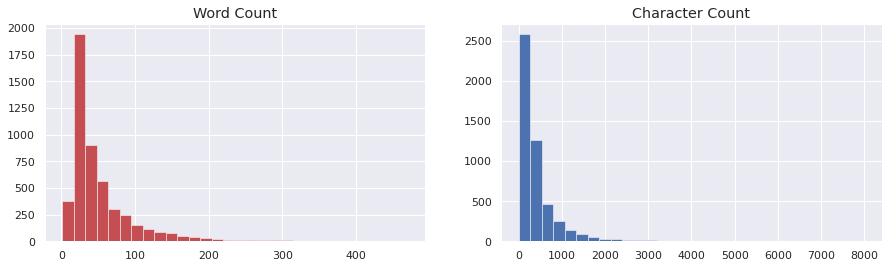

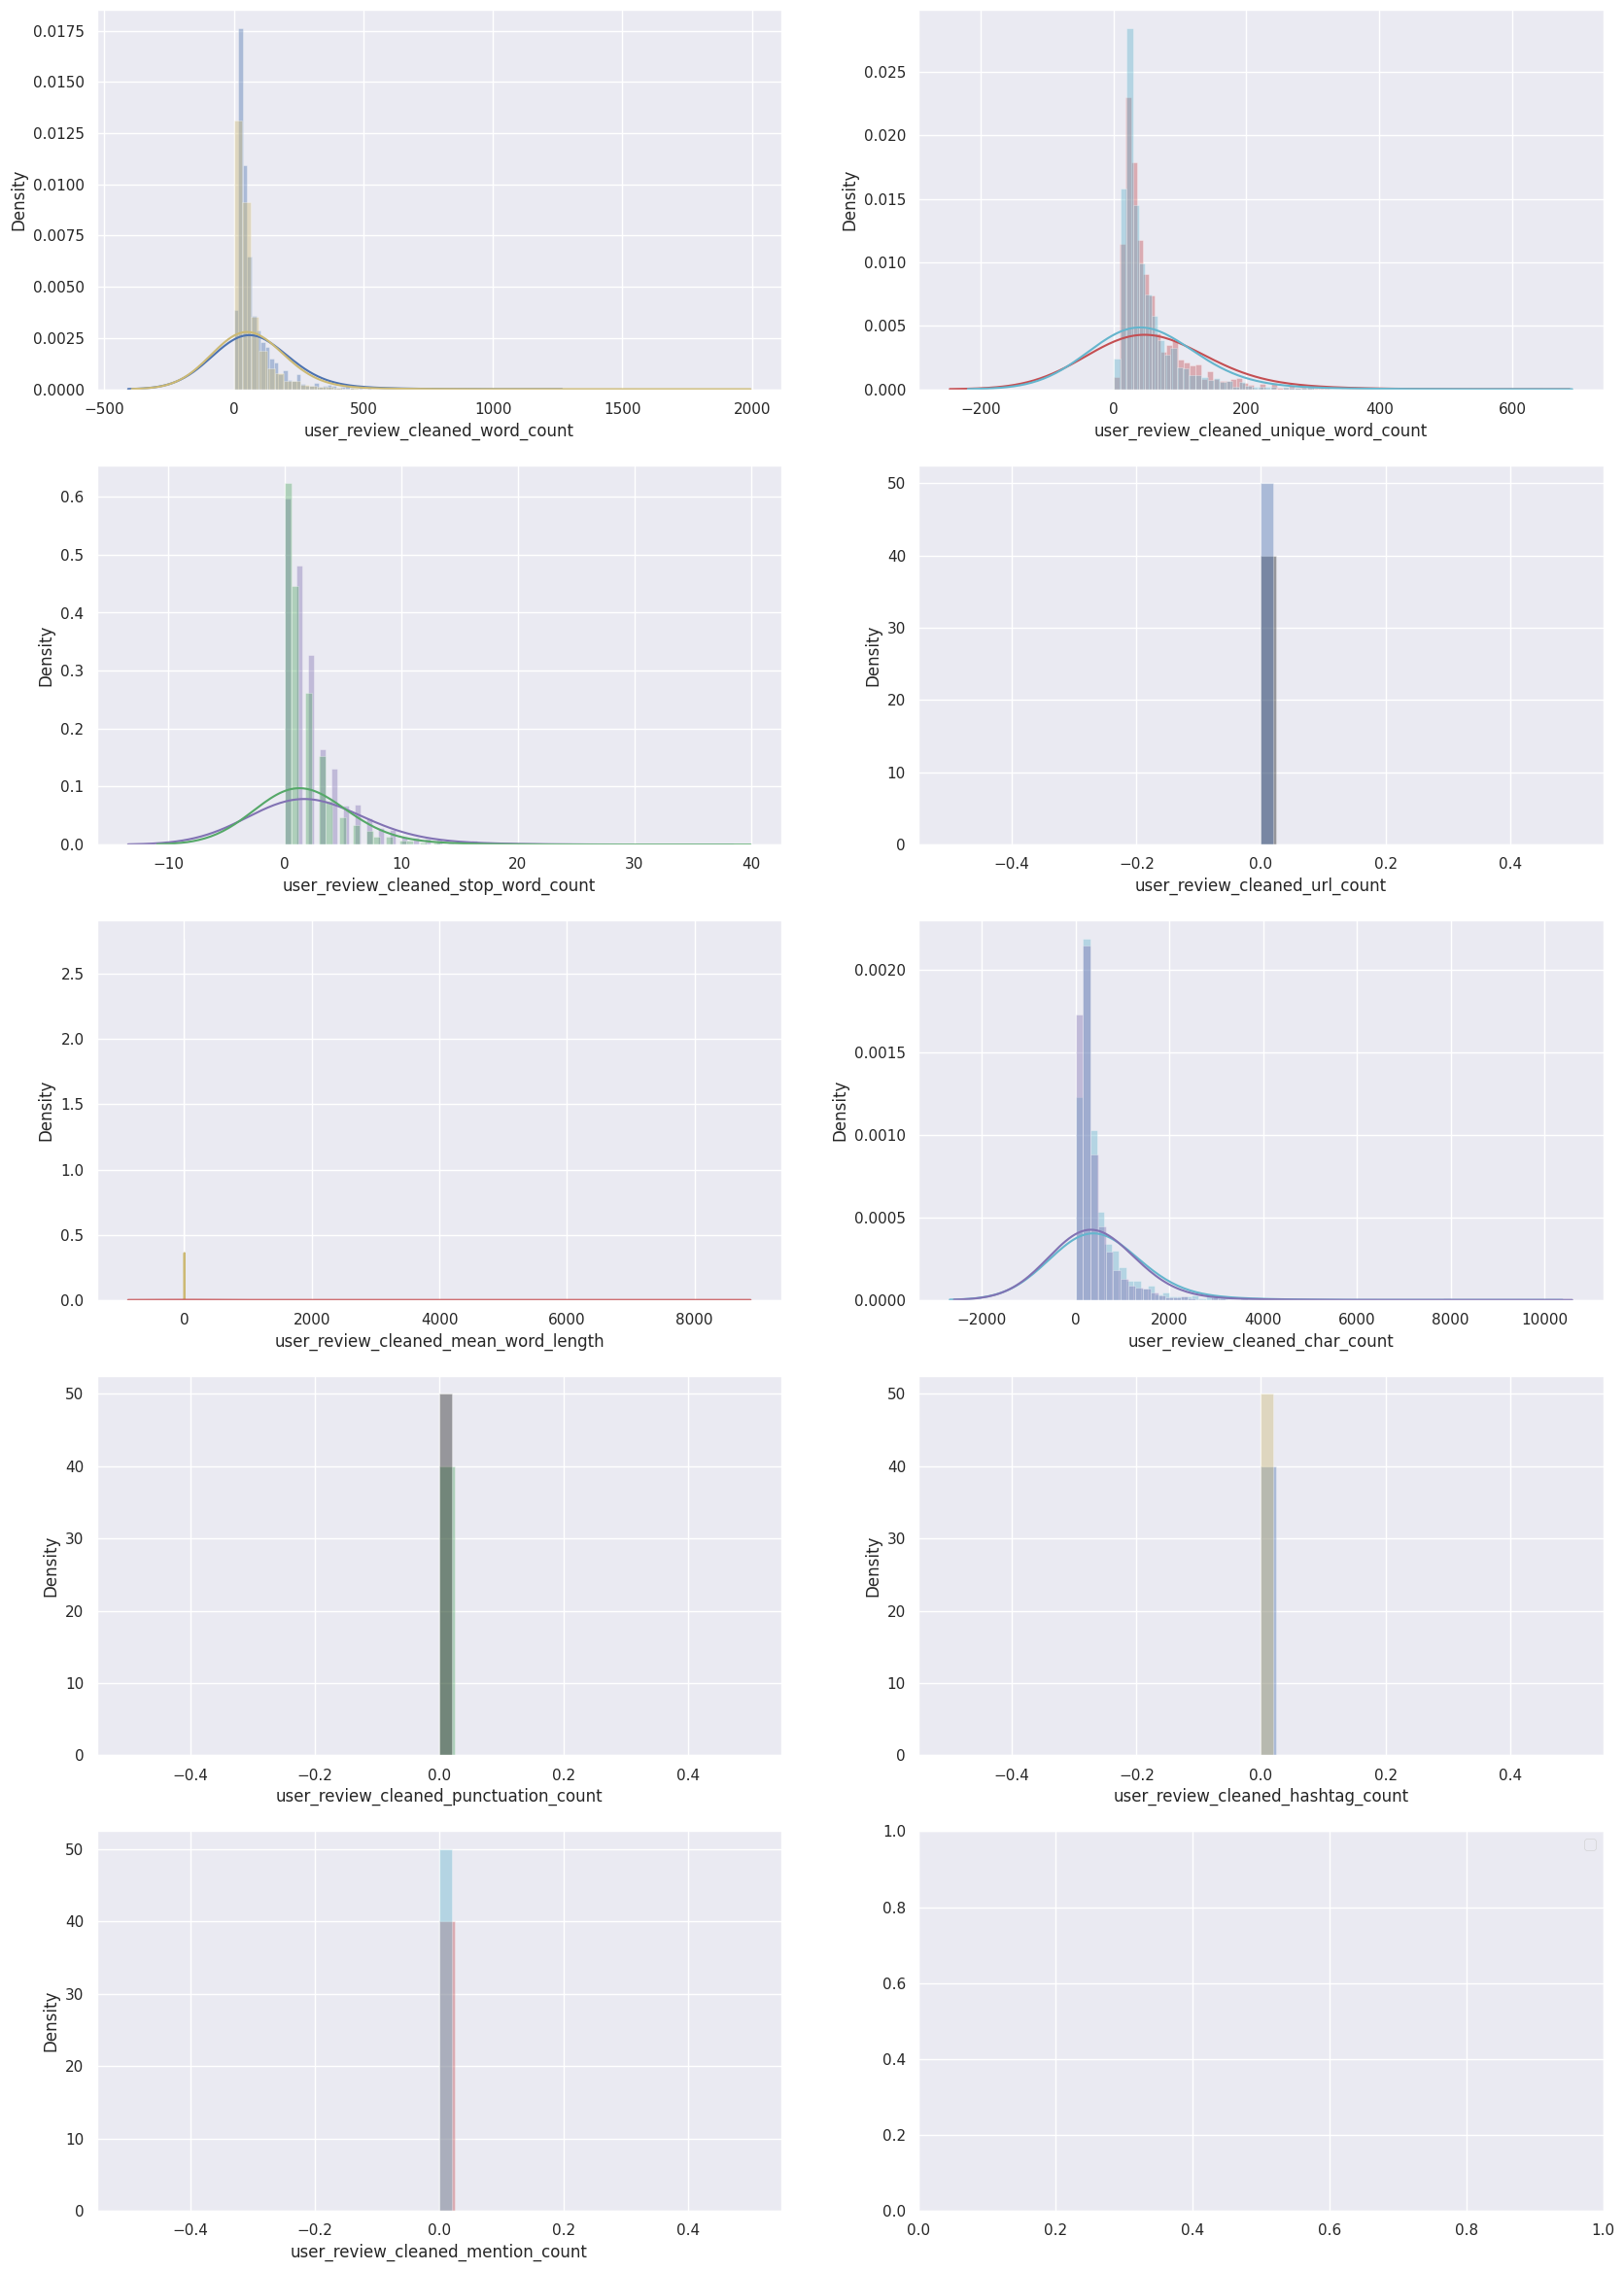

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for user_review_cleaned column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 7 seconds
        Time Taken for Processing text in data = 29 seconds
Train data Text cleaning completed. Time taken = 43 seconds

For target = user_suggestion

    For class = 0
Top 200 n-grams
: ['time', 'like', 'make', 'good', 'fun', 'even', 'bad', 'player', 'want', 'access', 'go', 'early', 'would', 'really', 'new', 'money', 'hour', 'people', 'way', 'well', 'much', 'use', 'take', 'try', 'tank', 'update', 'start', 'give', 'every', 'thing', 'cannot', 'pay', 'also', 'community', 'need', 'year', 'great', 'match', 'grind', 'think', 'know', 'fix', 'free', 'back', 'see', 'recommend', 'spend', 'come', 'kill', 'look', 'dont', 'could', 'balance', 'since', 'win', 'never', 'many', 'love', 'team', 'change', 'firs

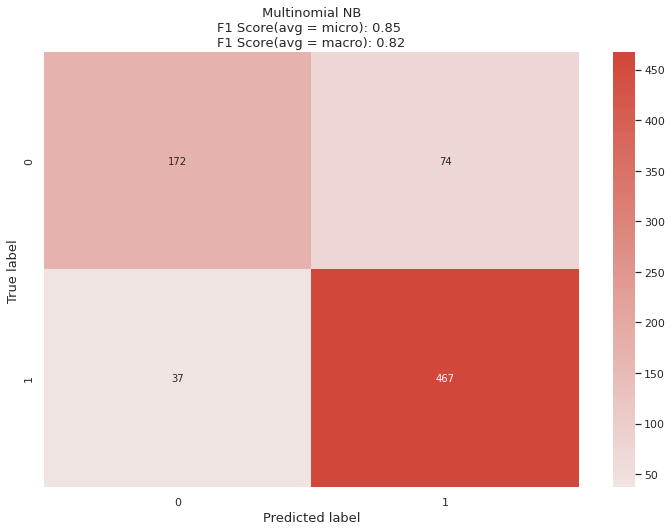

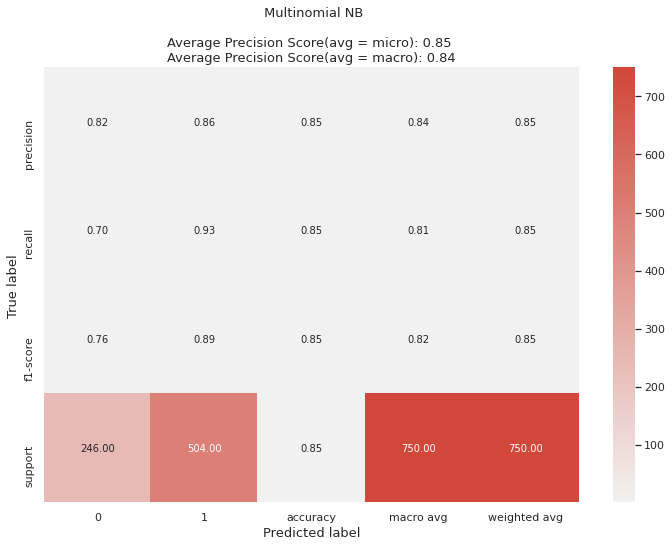

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 7 seconds
        Time Taken for Processing text in data = 27 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 6 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 7 seconds
        Time Taken for Processing text in data = 27 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 6 seconds
Training completed. Time taken for Auto_NLP = 5.2 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [ ]:
#The reason for using a autonlp is to see the disturbution of the data and what models fits into the given dataframe.s you can see
# we have only taken sample of dataset because running the whole dataset with k fold validation required lot of ram or 
#computational power which is not avaialble in the free version of colab.

#This process atleast gives you an idea that which process to go for by applying this automl.Here we can ca nsee Tfidfvectorizer and Multinominal NB works good.
from autoviml.Auto_NLP import Auto_NLP
nlp_column = 'user_review_cleaned'
target = 'user_suggestion'
train_nlp, test_nlp, nlp_transformer, preds = Auto_NLP(
              nlp_column, train, test, target, score_type='f1-score',
                modeltype='Classification',top_num_features=2, verbose=2,
                build_model=True)

In [ ]:
train_nlp.head()

review_id  user_suggestion  \
0          1                1   
1          2                1   
2          3                1   
3          4                1   
4          5                1   

                                                                                                                                                                                                                                                                                                                                                                                          user_review_cleaned  \
0  scared hearing creepy voice pause moment write review wait heart beat return atleast somewhat calm time game adorable creepy like happy tree friend graphic sceme childhood bubble clean hello charactes isnot try kill likable bit odd noob thing though look class room full ghost dead child let shine flashlight stand star hmm creepy music turn around see see chasing game afraid finding lock door   
1                                                                                                                                                                                                                                                                                                 best game well sam pepper youtube account need computersome extra forgot mention scary consume download yet   
2                                                                                                                                                                                littly iffy control know play easy master make floor due certain circumstance unable finish game relate worry highly recommend casual play maybe friend two watch hilarity ensues especially hit floor fun fellow fleshlings   
3                                                                                                                                                                                                                                                      great game fun colorful side note though windowed mode computer hat fullscreen yeah computer like run shame really enjoyable guess settle skyrim cheer   
4                                                                                                                                                                                                                               many game cute tag right next horror tag first play game late come back first time since game good free take advantage experience try room close progress darker game becomes   

   user_review_cleaned_word_count  user_review_cleaned_unique_word_count  \
0                              64                                     60   
1                              17                                     17   
2                              33                                     31   
3                              24                                     23   
4                              31                                     26   

   user_review_cleaned_stop_word_count  user_review_cleaned_url_count  \
0                                    0                              0   
1                                    1                              0   
2                                    0                              0   
3                                    1                              0   
4                                    1                              0   

   user_review_cleaned_mean_word_length  user_review_cleaned_char_count  \
0                                     5                             394   
1                                     5                             111   
2                                     5                             220   
3                                     5                             154   
4                                     4                             177   

   user_review_cleaned_punctuation_count  user_rev

**APPROACH-2**

*   Here we can find for the first approach that TFidf vectorizer can be used over the data and once we use it now we can apply pycaret package to find the entire stats of which model which model is providing what kind of precision,recall f1 score.
*   It is very ram intensive so it becomes diffcult over a big scale data without a proper infrastructure.



In [ ]:
train=train[['review_id', 'user_suggestion', 'user_review_cleaned']]
test=test[['review_id', 'user_review_cleaned']]

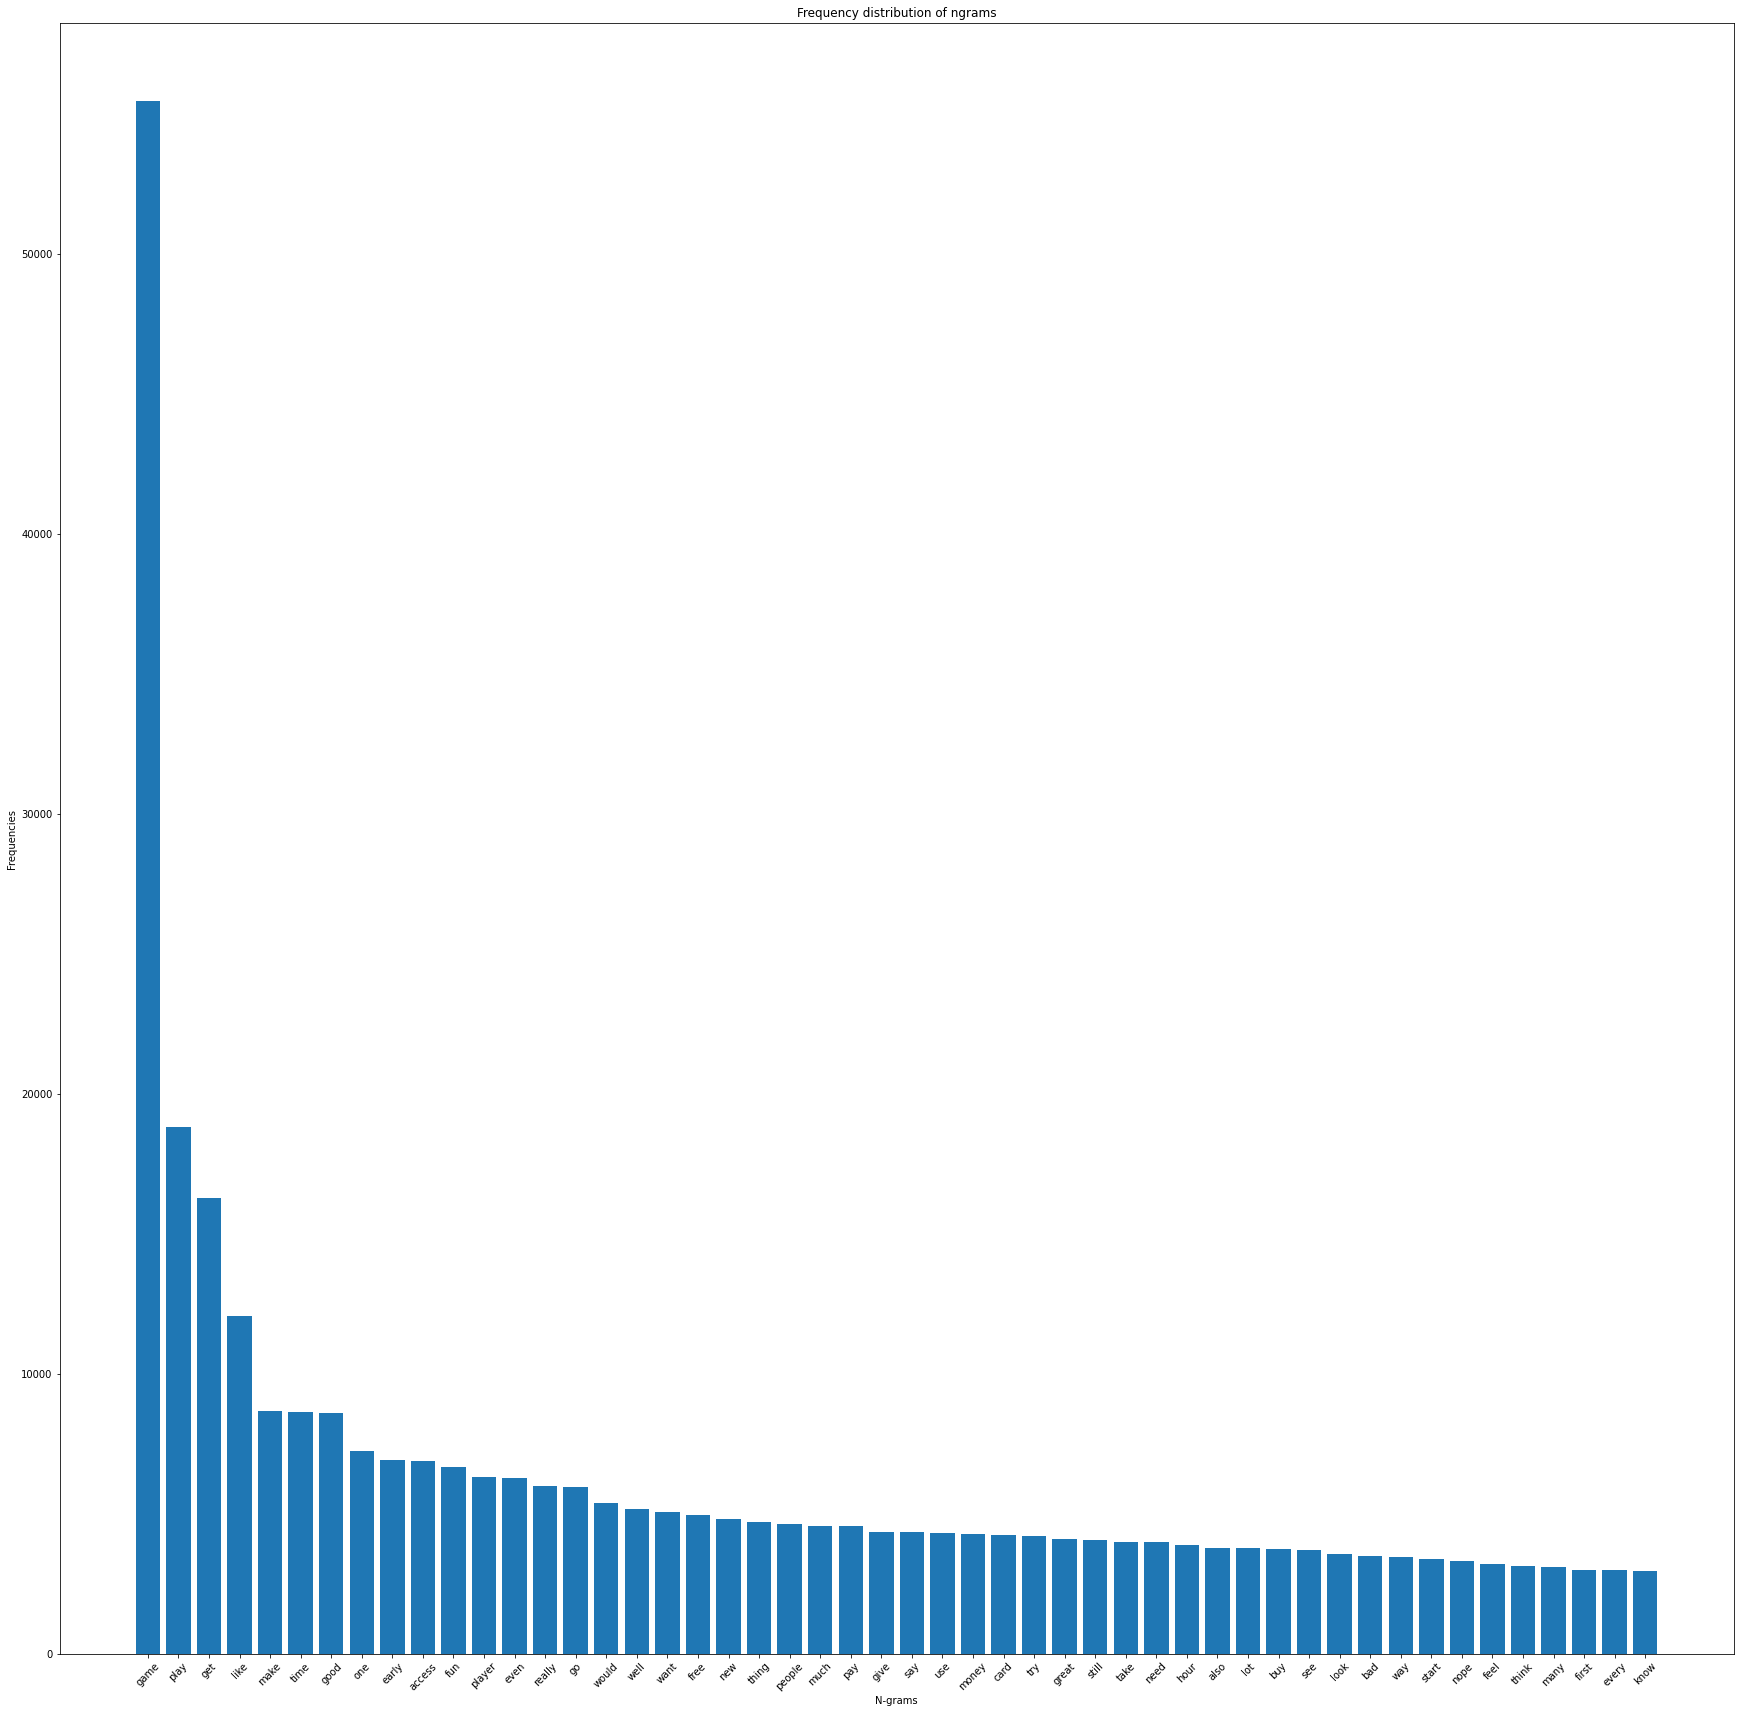

In [ ]:
kwargs = {
    'ngram_range' : (1, 1),
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : 'word'
}

vectorizer = CountVectorizer(**kwargs)
vect_texts = vectorizer.fit_transform(list(train['user_review_cleaned']))
all_ngrams = vectorizer.get_feature_names()
num_ngrams = min(50, len(all_ngrams))
all_counts = vect_texts.sum(axis=0).tolist()[0]

all_ngrams, all_counts = zip(*[(n, c) for c, n in sorted(zip(all_counts, all_ngrams), reverse=True)])
ngrams = all_ngrams[:num_ngrams]
counts = all_counts[:num_ngrams]

idx = np.arange(num_ngrams)

plt.figure(figsize=(30, 30))
plt.bar(idx, counts, width=0.8)
plt.xlabel('N-grams')
plt.ylabel('Frequencies')
plt.title('Frequency distribution of ngrams')
plt.xticks(idx, ngrams, rotation=45)
plt.show()

In [ ]:
NGRAM_RANGE = (1, 2)
TOP_K = 20000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

def ngram_vectorize(train_texts, train_labels, val_texts):
    kwargs = {
        'ngram_range' : NGRAM_RANGE,
        'dtype' : 'int32',
        'strip_accents' : 'unicode',
        'decode_error' : 'replace',
        'analyzer' : TOKEN_MODE,
        'min_df' : MIN_DOC_FREQ,
    }
    
    # Learn Vocab from train texts and vectorize train and val sets
    tfidf_vectorizer = TfidfVectorizer(**kwargs)
    x_train = tfidf_vectorizer.fit_transform(train_texts)
    x_val = tfidf_vectorizer.transform(val_texts)
    
    # Select best k features, with feature importance measured by f_classif
    selector = SelectKBest(f_classif, k=min(TOP_K, x_train.shape[1]))
    selector.fit(x_train, train_labels)
    x_train = selector.transform(x_train).astype('float32')
    x_val = selector.transform(x_val).astype('float32')

    x_train=pd.DataFrame(x_train.toarray(), columns=selector.get_support(indices=True))
    x_val=pd.DataFrame(x_val.toarray(), columns=selector.get_support(indices=True))
    return x_train, x_val

In [ ]:
train_texts=train['user_review_cleaned'].tolist()
train_labels=train['user_suggestion'].tolist()
test_texts=test['user_review_cleaned'].tolist()

x_train,x_val=ngram_vectorize(train_texts, train_labels, val_texts)

In [ ]:
#!pip install pycaret
x_train['target']=train['user_suggestion']

In [ ]:
#This is the best and easiest  approach to find out the best model but it is pretty intensive so it becomes immpossible to run on this colab infrastructure.
from pycaret.classification import *
exp1=setup(x_train,target='target',session_id=3435)


**APPROACH-3**

*   This approach is a traditional approach to find out the best model by appling different algorithm one by one anf the go for hyper parameter tuning of the given model.
*   This approach should be used only you get an idea about the data distrubution and best model information from first two approachs.



In [6]:
train=pd.read_csv('/content/train.csv',delimiter=',')
game_overview=pd.read_csv('/content/game_overview.csv')
test=pd.read_csv('/content/test.csv',delimiter=',')
sample_submission=pd.read_csv('/content/sample_submission.csv')

train['user_review_cleaned']=train['user_review'].apply(lambda x:clean_text(x,contractions_dict))
test['user_review_cleaned']=test['user_review'].apply(lambda x:clean_text(x,contractions_dict))
train=train[['review_id', 'user_suggestion', 'user_review_cleaned']]
test=test[['review_id', 'user_review_cleaned']]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(train['user_review_cleaned'].values, train['user_suggestion'].values, 
                                                  stratify=train['user_suggestion'].values, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)


In [27]:
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
def train_model(train,count_vec,model):
  train["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  train = train.sample(frac=1).reset_index(drop=True)  
  #fetch labels  
  y = train.user_suggestion.values  
  #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
  #fill the new kfold column  
  for f, (t_, v_) in enumerate(kf.split(X=train[['review_id','user_review_cleaned']], y=y)):  
    train.loc[v_, 'kfold'] = f  
  #we go over the folds created  
  for fold_ in range(5):  
    #temporary dataframes for train and test  
    train_df = train[train.kfold != fold_].reset_index(drop=True)
    test_df = train[train.kfold == fold_].reset_index(drop=True)  
    #initialize CountVectorizer with NLTK's word_tokenize  
    #function as tokenizer    
    #fit count_vec on training data reviews  
    count_vec.fit(train_df.user_review_cleaned)  
    #transform training and validation data reviews  
    xtrain = count_vec.transform(train_df.user_review_cleaned)  
    xtest = count_vec.transform(test_df.user_review_cleaned)  
    #initialize  model  
    #fit the model on training data reviews and sentiment  
    model.fit(xtrain, train_df.user_suggestion)  
    #make predictions on test data 
    #threshold for predictions is 0.5  
    preds = model.predict(xtest)  
    #calculate accuracy  
    accuracy = metrics.f1_score(test_df.user_suggestion, preds)  
    print(f"Fold: {fold_}")  
    print(f"f1score = {accuracy}")  
    print("")

In [30]:
#TFIDF vectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

#Count vectorizer
ctv = CountVectorizer(analyzer='word',
            ngram_range=(1, 3), stop_words = 'english')

#model intialization
# Fitting a simple Logistic Regression on Counts
clf = linear_model.LogisticRegression(C=1.0)
#Multinominal NB
clf_NB = MultinomialNB()
# Fitting a simple xgboost on tf-idf
clf_xgb = xgb.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, 
                        subsample=0.8, nthread=10, learning_rate=0.1)

In [ ]:
#Multinominal NB build model-tfidf vectorizer
train_model(train,tfv,clf_NB)

Fold: 0
f1score = 0.8613636363636363

Fold: 1
f1score = 0.8512266486608149

Fold: 2
f1score = 0.8528010886822408

Fold: 3
f1score = 0.8598813327247832

Fold: 4
f1score = 0.8564920273348519



In [ ]:
#Multinominal NB build model-count vectorizer
train_model(train,ctv,clf_NB)


Fold: 0
f1score = 0.8542642924086222

Fold: 1
f1score = 0.8578703703703703

Fold: 2
f1score = 0.8609179415855354

Fold: 3
f1score = 0.8595387840670861

Fold: 4
f1score = 0.8530087276067982



In [ ]:
#Logistic build model-TFIDF
train_model(train,tfv,clf)

Fold: 0
f1score = 0.8654173764906302

Fold: 1
f1score = 0.8716315531602156

Fold: 2
f1score = 0.8732190292199952

Fold: 3
f1score = 0.8657441126487012

Fold: 4
f1score = 0.8652550529355149



In [ ]:
#XGboost build model TFIDF
train_model(train,tfv,clf_xgb)

Fold: 0
f1score = 0.8380350194552529

Fold: 1
f1score = 0.8425177565515553

Fold: 2
f1score = 0.8396798447732233

Fold: 3
f1score = 0.8406287787182587

Fold: 4
f1score = 0.8390033540967897



In [ ]:
nb_model = MultinomialNB()

# Create the pipeline 
clf = pipeline.Pipeline([('nb', nb_model)])

# parameter grid
param_grid = {'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

mll_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=False, needs_proba=False)

# Initialize Grid Search Model
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=mll_scorer,
                                 verbose=10, n_jobs=-1, iid=True, refit=True, cv=2)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain) 
# Fit Grid Search Model
model.fit(xtrain_tfv, ytrain) 
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s


Best score: -0.726
Best parameters set:
	nb__alpha: 100


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.4s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  _store('score_time', score_time)


**APPROACH-4**

*   Use of word embeddings to find the result
*   Here we are using sentence to vec by prebuild glove word embeddings found in nlp stanford.One can use different variant of word embeddingds and try the same on the data.



In [8]:
#Load Glove vectors in a dictionary
!wget http://nlp.stanford.edu/data/glove.6B.zip  
!unzip glove*.zip

--2020-11-27 12:01:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-11-27 12:01:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-11-27 12:01:03--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [9]:
def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines  = line.split()
        word = splitLines[0]
        coefs = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = coefs
    print(len(gloveModel)," words loaded!")
    f.close()
    return gloveModel
embeddings_index=loadGloveModel('/content/glove.6B.300d.txt')

Loading Glove Model
400000  words loaded!


In [10]:
from nltk.corpus import wordnet,stopwords
stop_words = stopwords.words('english')
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [11]:
# create sentence vectors using the above function for training and validation set
from sklearn.model_selection import train_test_split
from tqdm import tqdm
xtrain, xvalid, ytrain, yvalid = train_test_split(train['user_review_cleaned'].values, train['user_suggestion'].values, 
                                                  stratify=train['user_suggestion'].values, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)
xtrain_glove = [sent2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]
xtrain_glove = np.array(xtrain_glove)
xvalid_glove = np.array(xvalid_glove)

100%|██████████| 1750/1750 [00:01<00:00, 1733.83it/s]


In [12]:
#Test data
xtest=test['user_review_cleaned'].values
xtest_glove = [sent2vec(x) for x in tqdm(xtest)]
xtest_glove=np.array(xtest_glove)

100%|██████████| 8045/8045 [00:04<00:00, 1645.93it/s]


In [ ]:
#Don't use Naive Bayes  or other matrix factorization because Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features
#As  MultinomialNB does not accept the non-negative values
clf = xgb.XGBClassifier(nthread=10, silent=False)
clf.fit(xtrain_glove, ytrain)
predictions = clf.predict(xvalid_glove)

array([1, 1, 1, ..., 0, 0, 1])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
from sklearn import model_selection  
from sklearn import linear_model
from sklearn import metrics
def train_model_glove(train,clf_xgb):
  train["kfold"] = -1  
  #the next step is to randomize the rows of the data  
  train = train.sample(frac=1).reset_index(drop=True)  
    #fetch labels  
  y = train.user_suggestion.values  
    #initiate the kfold class from model_selection module  
  kf = model_selection.StratifiedKFold(n_splits=5)  
    #fill the new kfold column  
  for f, (t_, v_) in enumerate(kf.split(X=train[['review_id','user_review_cleaned']], y=y)):  
    train.loc[v_, 'kfold'] = f  
    #we go over the folds created  
  for fold_ in range(5):  
      #temporary dataframes for train and test  
    train_df = train[train.kfold != fold_].reset_index(drop=True)
    test_df = train[train.kfold == fold_].reset_index(drop=True)  
      #initialize CountVectorizer with NLTK's word_tokenize  
      #function as tokenizer    
      #fit count_vec on training data reviews  
      #count_vec.fit(train_df.user_review_cleaned)  
      #transform training and validation data reviews  
    xtrain_glove = [sent2vec(x) for x in tqdm(train_df.values)]
    xvalid_glove = [sent2vec(x) for x in tqdm(test_df.values)]
    xtrain_glove = np.array(xtrain_glove)
    xvalid_glove = np.array(xvalid_glove)
      #initialize  model  
      #fit the model on training data reviews and sentiment  
    clf_xgb.fit(xtrain_glove, train_df.user_suggestion.values)  
      #make predictions on test data 
      #threshold for predictions is 0.5  
    preds = clf_xgb.predict(xvalid_glove)  
      #calculate accuracy  
    accuracy = metrics.f1_score(test_df.user_suggestion, preds)  
    print(f"Fold: {fold_}")  
    print(f"f1score = {accuracy}")  
    print("")

In [ ]:
train_model_glove(train,clf)



  0%|          | 0/13995 [00:00<?, ?it/s]

  1%|          | 140/13995 [00:00<00:09, 1398.21it/s]

  2%|▏         | 261/13995 [00:00<00:10, 1335.65it/s]

  3%|▎         | 383/13995 [00:00<00:10, 1297.29it/s]

  4%|▎         | 512/13995 [00:00<00:10, 1292.78it/s]

  5%|▍         | 632/13995 [00:00<00:10, 1260.50it/s]

  5%|▌         | 769/13995 [00:00<00:10, 1291.09it/s]

  6%|▋         | 887/13995 [00:00<00:10, 1241.20it/s]

  7%|▋         | 1020/13995 [00:00<00:10, 1264.27it/s]

  8%|▊         | 1153/13995 [00:00<00:10, 1280.97it/s]

  9%|▉         | 1276/13995 [00:01<00:10, 1254.68it/s]

 10%|█         | 1406/13995 [00:01<00:09, 1265.94it/s]

 11%|█         | 1544/13995 [00:01<00:09, 1298.04it/s]

 12%|█▏        | 1678/13995 [00:01<00:09, 1309.28it/s]

 13%|█▎        | 1810/13995 [00:01<00:09, 1310.89it/s]

 14%|█▍        | 1941/13995 [00:01<00:09, 1285.23it/s]

 15%|█▍        | 2093/13995 [00:01<00:08, 1346.79it/s]

 16%|█▌        | 2229/13995 [00:01<00:08, 1327.57it/s]

 17%|█▋   

Fold: 0
f1score = 0.7911132576672302





  2%|▏         | 223/13995 [00:00<00:12, 1143.92it/s]

  3%|▎         | 353/13995 [00:00<00:11, 1183.63it/s]

  3%|▎         | 487/13995 [00:00<00:11, 1225.56it/s]

  4%|▍         | 605/13995 [00:00<00:11, 1208.91it/s]

  5%|▌         | 738/13995 [00:00<00:10, 1242.04it/s]

  6%|▋         | 880/13995 [00:00<00:10, 1284.00it/s]

  7%|▋         | 1028/13995 [00:00<00:09, 1336.05it/s]

  8%|▊         | 1162/13995 [00:00<00:09, 1321.61it/s]

  9%|▉         | 1291/13995 [00:01<00:09, 1299.33it/s]

 10%|█         | 1419/13995 [00:01<00:10, 1205.35it/s]

 11%|█         | 1539/13995 [00:01<00:10, 1145.50it/s]

 12%|█▏        | 1670/13995 [00:01<00:10, 1189.05it/s]

 13%|█▎        | 1802/13995 [00:01<00:09, 1224.81it/s]

 14%|█▍        | 1931/13995 [00:01<00:09, 1242.72it/s]

 15%|█▍        | 2069/13995 [00:01<00:09, 1279.23it/s]

 16%|█▌        | 2207/13995 [00:01<00:09, 1304.40it/s]

 17%|█▋        | 2339/13995 [00:01<00:09, 1276.97it/s]

 18%|█▊        | 2468/13995 [00:01<00:09, 1244.92it/

Fold: 1
f1score = 0.7964903728978796





  2%|▏         | 232/13995 [00:00<00:11, 1195.01it/s]

  3%|▎         | 361/13995 [00:00<00:11, 1215.53it/s]

  4%|▎         | 495/13995 [00:00<00:10, 1249.56it/s]

  4%|▍         | 617/13995 [00:00<00:10, 1238.61it/s]

  5%|▌         | 747/13995 [00:00<00:10, 1255.97it/s]

  6%|▌         | 869/13995 [00:00<00:10, 1242.34it/s]

  7%|▋         | 1004/13995 [00:00<00:10, 1272.34it/s]

  8%|▊         | 1150/13995 [00:00<00:09, 1319.59it/s]

  9%|▉         | 1278/13995 [00:01<00:09, 1293.70it/s]

 10%|█         | 1405/13995 [00:01<00:10, 1185.86it/s]

 11%|█         | 1524/13995 [00:01<00:10, 1170.27it/s]

 12%|█▏        | 1656/13995 [00:01<00:10, 1211.04it/s]

 13%|█▎        | 1797/13995 [00:01<00:09, 1264.37it/s]

 14%|█▍        | 1925/13995 [00:01<00:09, 1264.10it/s]

 15%|█▍        | 2056/13995 [00:01<00:09, 1269.34it/s]

 16%|█▌        | 2198/13995 [00:01<00:08, 1311.00it/s]

 17%|█▋        | 2330/13995 [00:01<00:08, 1304.82it/s]

 18%|█▊        | 2463/13995 [00:01<00:08, 1291.33it/

Fold: 2
f1score = 0.7932611311672684





  2%|▏         | 210/13995 [00:00<00:13, 1053.37it/s]

  2%|▏         | 333/13995 [00:00<00:12, 1099.18it/s]

  3%|▎         | 455/13995 [00:00<00:11, 1131.84it/s]

  4%|▍         | 573/13995 [00:00<00:11, 1144.17it/s]

  5%|▌         | 707/13995 [00:00<00:11, 1196.28it/s]

  6%|▌         | 848/13995 [00:00<00:10, 1252.59it/s]

  7%|▋         | 988/13995 [00:00<00:10, 1292.44it/s]

  8%|▊         | 1138/13995 [00:00<00:09, 1347.86it/s]

  9%|▉         | 1270/13995 [00:01<00:09, 1297.38it/s]

 10%|▉         | 1399/13995 [00:01<00:10, 1198.16it/s]

 11%|█         | 1520/13995 [00:01<00:10, 1187.18it/s]

 12%|█▏        | 1656/13995 [00:01<00:10, 1223.70it/s]

 13%|█▎        | 1786/13995 [00:01<00:09, 1245.22it/s]

 14%|█▎        | 1914/13995 [00:01<00:09, 1254.84it/s]

 15%|█▍        | 2046/13995 [00:01<00:09, 1273.04it/s]

 16%|█▌        | 2185/13995 [00:01<00:09, 1304.96it/s]

 17%|█▋        | 2317/13995 [00:01<00:08, 1308.15it/s]

 17%|█▋        | 2449/13995 [00:01<00:09, 1249.98it/s

Fold: 3
f1score = 0.7941320293398533





  2%|▏         | 230/13996 [00:00<00:11, 1178.38it/s]

  3%|▎         | 357/13996 [00:00<00:11, 1203.13it/s]

  4%|▎         | 491/13996 [00:00<00:10, 1240.99it/s]

  4%|▍         | 608/13996 [00:00<00:11, 1216.62it/s]

  5%|▌         | 729/13996 [00:00<00:10, 1213.61it/s]

  6%|▌         | 866/13996 [00:00<00:10, 1254.85it/s]

  7%|▋         | 1002/13996 [00:00<00:10, 1282.33it/s]

  8%|▊         | 1147/13996 [00:00<00:09, 1323.90it/s]

  9%|▉         | 1276/13996 [00:01<00:09, 1287.05it/s]

 10%|█         | 1402/13996 [00:01<00:10, 1179.33it/s]

 11%|█         | 1520/13996 [00:01<00:10, 1166.25it/s]

 12%|█▏        | 1652/13996 [00:01<00:10, 1207.03it/s]

 13%|█▎        | 1782/13996 [00:01<00:09, 1231.83it/s]

 14%|█▎        | 1906/13996 [00:01<00:09, 1219.86it/s]

 15%|█▍        | 2038/13996 [00:01<00:09, 1247.90it/s]

 16%|█▌        | 2193/13996 [00:01<00:08, 1324.86it/s]

 17%|█▋        | 2328/13996 [00:01<00:08, 1304.80it/s]

 18%|█▊        | 2460/13996 [00:01<00:08, 1294.69it/

Fold: 4
f1score = 0.8010635726371769



**APPROACH-5** 

*   This approach includes the approach of deep learning.Creation of different layers
*   



In [14]:
# scale the data before any neural net:
from sklearn import preprocessing
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove) 

In [29]:
#Test data
xtest_glove=scl.transform(xtest_glove)

In [13]:
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization

ytrain_enc = np_utils.to_categorical(ytrain)
yvalid_enc = np_utils.to_categorical(yvalid)


In [15]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 70

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)


word_index = token.word_index

In [16]:
#Test data
xtest=test['user_review_cleaned'].values
xtest_seq=token.texts_to_sequences(xtest)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)

In [17]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 46341/46341 [00:00<00:00, 625573.67it/s]


In [18]:
#ceation of metrics
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [22]:
# A simple LSTM with glove embeddings and two dense layers 
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_f1_m', min_delta=0, patience=6, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/100
31/31 [==============================] - 8s 244ms/step - loss: 0.6491 - acc: 0.6230 - f1_m: 0.6159 - precision_m: 0.6180 - recall_m: 0.6140 - val_loss: 0.5814 - val_acc: 0.7160 - val_f1_m: 0.7235 - val_precision_m: 0.7231 - val_recall_m: 0.7238
Epoch 2/100
31/31 [==============================] - 7s 229ms/step - loss: 0.5489 - acc: 0.7301 - f1_m: 0.7276 - precision_m: 0.7285 - recall_m: 0.7267 - val_loss: 0.5011 - val_acc: 0.7560 - val_f1_m: 0.7588 - val_precision_m: 0.7577 - val_recall_m: 0.7599
Epoch 3/100
31/31 [==============================] - 7s 234ms/step - loss: 0.5207 - acc: 0.7499 - f1_m: 0.7502 - precision_m: 0.7492 - recall_m: 0.7511 - val_loss: 0.4878 - val_acc: 0.7663 - val_f1_m: 0.7676 - val_precision_m: 0.7653 - val_recall_m: 0.7699
Epoch 4/100
31/31 [==============================] - 7s 238ms/step - loss: 0.5110 - acc: 0.7543 - f1_m: 0.7529 - precision_m: 0.7531 - recall_m: 0.7527 - val_loss: 0.4859 - val_acc: 0.7771 - val_f1_m: 0.7833 - val_precision_m: 0.

In [ ]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_f1_m', min_delta=0, patience=10, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=100, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

Epoch 1/100
31/31 [==============================] - 16s 519ms/step - loss: 0.6506 - acc: 0.6159 - f1_m: 0.6120 - precision_m: 0.6114 - recall_m: 0.6135 - val_loss: 0.5418 - val_acc: 0.7131 - val_f1_m: 0.7106 - val_precision_m: 0.7114 - val_recall_m: 0.7098
Epoch 2/100
31/31 [==============================] - 16s 505ms/step - loss: 0.5438 - acc: 0.7306 - f1_m: 0.7302 - precision_m: 0.7309 - recall_m: 0.7296 - val_loss: 0.4968 - val_acc: 0.7583 - val_f1_m: 0.7569 - val_precision_m: 0.7565 - val_recall_m: 0.7572
Epoch 3/100
31/31 [==============================] - 15s 485ms/step - loss: 0.5188 - acc: 0.7454 - f1_m: 0.7450 - precision_m: 0.7454 - recall_m: 0.7446 - val_loss: 0.4853 - val_acc: 0.7674 - val_f1_m: 0.7656 - val_precision_m: 0.7649 - val_recall_m: 0.7664
Epoch 4/100
31/31 [==============================] - 16s 503ms/step - loss: 0.5058 - acc: 0.7584 - f1_m: 0.7561 - precision_m: 0.7574 - recall_m: 0.7549 - val_loss: 0.4813 - val_acc: 0.7811 - val_f1_m: 0.7831 - val_precision_m

In [19]:
# GRU with glove embeddings and two dense layers
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m, recall_m])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='f1_m', min_delta=0, patience=6, verbose=0, mode='auto')
model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=60, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/60
31/31 [==============================] - 14s 461ms/step - loss: 0.6681 - acc: 0.5837 - f1_m: 0.6477 - precision_m: 0.5377 - recall_m: 0.8252 - val_loss: 0.6005 - val_acc: 0.6840 - val_f1_m: 0.7069 - val_precision_m: 0.6087 - val_recall_m: 0.8429
Epoch 2/60
31/31 [==============================] - 14s 445ms/step - loss: 0.5912 - acc: 0.6977 - f1_m: 0.7160 - precision_m: 0.6140 - recall_m: 0.8631 - val_loss: 0.5632 - val_acc: 0.7246 - val_f1_m: 0.7492 - val_precision_m: 0.6791 - val_recall_m: 0.8357
Epoch 3/60
31/31 [==============================] - 14s 449ms/step - loss: 0.5474 - acc: 0.7337 - f1_m: 0.7423 - precision_m: 0.6706 - recall_m: 0.8338 - val_loss: 0.4939 - val_acc: 0.7686 - val_f1_m: 0.7790 - val_precision_m: 0.7363 - val_recall_m: 0.8270
Epoch 4/60
31/31 [==============================] - 14s 448ms/step - loss: 0.5219 - acc: 0.7485 - f1_m: 0.7563 - precision_m: 0.7052 - recall_m: 0.8161 - val_loss: 0.4765 - val_acc: 0.7817 - val_f1_m: 0.7795 - val_precision_m: 0.

In [20]:
y_pred = model.predict(xtest_pad)

In [23]:
sample_submission['user_suggestion']=y_pred
sample_submission.to_csv('submission.csv',index=False)

**ENSEMBLING**

In [25]:
# this is the main ensembling class. how to use it is in the next cell!
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold
import pandas as pd
import os
import sys
import logging

logging.basicConfig(
    level=logging.DEBUG,
    format="[%(asctime)s] %(levelname)s %(message)s",
    datefmt="%H:%M:%S", stream=sys.stdout)
logger = logging.getLogger(__name__)


class Ensembler(object):
    def __init__(self, model_dict, num_folds=3, task_type='classification', optimize=roc_auc_score,
                 lower_is_better=False, save_path=None):
        """
        Ensembler init function
        :param model_dict: model dictionary, see README for its format
        :param num_folds: the number of folds for ensembling
        :param task_type: classification or regression
        :param optimize: the function to optimize for, e.g. AUC, logloss, etc. Must have two arguments y_test and y_pred
        :param lower_is_better: is lower value of optimization function better or higher
        :param save_path: path to which model pickles will be dumped to along with generated predictions, or None
        """

        self.model_dict = model_dict
        self.levels = len(self.model_dict)
        self.num_folds = num_folds
        self.task_type = task_type
        self.optimize = optimize
        self.lower_is_better = lower_is_better
        self.save_path = save_path

        self.training_data = None
        self.test_data = None
        self.y = None
        self.lbl_enc = None
        self.y_enc = None
        self.train_prediction_dict = None
        self.test_prediction_dict = None
        self.num_classes = None

    def fit(self, training_data, y, lentrain):
        """
        :param training_data: training data in tabular format
        :param y: binary, multi-class or regression
        :return: chain of models to be used in prediction
        """

        self.training_data = training_data
        self.y = y

        if self.task_type == 'classification':
            self.num_classes = len(np.unique(self.y))
            logger.info("Found %d classes", self.num_classes)
            self.lbl_enc = LabelEncoder()
            self.y_enc = self.lbl_enc.fit_transform(self.y)
            kf = StratifiedKFold(n_splits=self.num_folds)
            train_prediction_shape = (lentrain, self.num_classes)
        else:
            self.num_classes = -1
            self.y_enc = self.y
            kf = KFold(n_splits=self.num_folds)
            train_prediction_shape = (lentrain, 1)

        self.train_prediction_dict = {}
        for level in range(self.levels):
            self.train_prediction_dict[level] = np.zeros((train_prediction_shape[0],
                                                          train_prediction_shape[1] * len(self.model_dict[level])))

        for level in range(self.levels):

            if level == 0:
                temp_train = self.training_data
            else:
                temp_train = self.train_prediction_dict[level - 1]

            for model_num, model in enumerate(self.model_dict[level]):
                validation_scores = []
                foldnum = 1
                for train_index, valid_index in kf.split(self.train_prediction_dict[0], self.y_enc):
                    logger.info("Training Level %d Fold # %d. Model # %d", level, foldnum, model_num)

                    if level != 0:
                        l_training_data = temp_train[train_index]
                        l_validation_data = temp_train[valid_index]
                        model.fit(l_training_data, self.y_enc[train_index])
                    else:
                        l0_training_data = temp_train[0][model_num]
                        if type(l0_training_data) == list:
                            l_training_data = [x[train_index] for x in l0_training_data]
                            l_validation_data = [x[valid_index] for x in l0_training_data]
                        else:
                            l_training_data = l0_training_data[train_index]
                            l_validation_data = l0_training_data[valid_index]
                        model.fit(l_training_data, self.y_enc[train_index])

                    logger.info("Predicting Level %d. Fold # %d. Model # %d", level, foldnum, model_num)

                    if self.task_type == 'classification':
                        temp_train_predictions = model.predict_proba(l_validation_data)
                        self.train_prediction_dict[level][valid_index,
                        (model_num * self.num_classes):(model_num * self.num_classes) +
                                                       self.num_classes] = temp_train_predictions

                    else:
                        temp_train_predictions = model.predict(l_validation_data)
                        self.train_prediction_dict[level][valid_index, model_num] = temp_train_predictions
                    validation_score = self.optimize(self.y_enc[valid_index], temp_train_predictions)
                    validation_scores.append(validation_score)
                    logger.info("Level %d. Fold # %d. Model # %d. Validation Score = %f", level, foldnum, model_num,
                                validation_score)
                    foldnum += 1
                avg_score = np.mean(validation_scores)
                std_score = np.std(validation_scores)
                logger.info("Level %d. Model # %d. Mean Score = %f. Std Dev = %f", level, model_num,
                            avg_score, std_score)

            logger.info("Saving predictions for level # %d", level)
            train_predictions_df = pd.DataFrame(self.train_prediction_dict[level])
            train_predictions_df.to_csv(os.path.join(self.save_path, "train_predictions_level_" + str(level) + ".csv"),
                                        index=False, header=None)

        return self.train_prediction_dict

    def predict(self, test_data, lentest):
        self.test_data = test_data
        if self.task_type == 'classification':
            test_prediction_shape = (lentest, self.num_classes)
        else:
            test_prediction_shape = (lentest, 1)

        self.test_prediction_dict = {}
        for level in range(self.levels):
            self.test_prediction_dict[level] = np.zeros((test_prediction_shape[0],
                                                         test_prediction_shape[1] * len(self.model_dict[level])))
        self.test_data = test_data
        for level in range(self.levels):
            if level == 0:
                temp_train = self.training_data
                temp_test = self.test_data
            else:
                temp_train = self.train_prediction_dict[level - 1]
                temp_test = self.test_prediction_dict[level - 1]

            for model_num, model in enumerate(self.model_dict[level]):

                logger.info("Training Fulldata Level %d. Model # %d", level, model_num)
                if level == 0:
                    model.fit(temp_train[0][model_num], self.y_enc)
                else:
                    model.fit(temp_train, self.y_enc)

                logger.info("Predicting Test Level %d. Model # %d", level, model_num)

                if self.task_type == 'classification':
                    if level == 0:
                        temp_test_predictions = model.predict_proba(temp_test[0][model_num])
                    else:
                        temp_test_predictions = model.predict_proba(temp_test)
                    self.test_prediction_dict[level][:, (model_num * self.num_classes): (model_num * self.num_classes) +
                                                                                        self.num_classes] = temp_test_predictions

                else:
                    if level == 0:
                        temp_test_predictions = model.predict(temp_test[0][model_num])
                    else:
                        temp_test_predictions = model.predict(temp_test)
                    self.test_prediction_dict[level][:, model_num] = temp_test_predictions

            test_predictions_df = pd.DataFrame(self.test_prediction_dict[level])
            test_predictions_df.to_csv(os.path.join(self.save_path, "test_predictions_level_" + str(level) + ".csv"),
                                       index=False, header=None)

        return self.test_prediction_dict

In [38]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [39]:
# specify the data to be used for every level of ensembling:
xtrain, xvalid, ytrain, yvalid = train_test_split(train['user_review_cleaned'].values, train['user_suggestion'].values, 
                                                  stratify=train['user_suggestion'].values, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)
tfv.fit(list(xtrain) + list(xvalid))
xtrain_tfv =  tfv.transform(xtrain)
xvalid_tfv=tfv.transform(xvalid)
xtrain_ctv=ctv.fit_transform(xtrain)
xvalid_ctv=ctv.fit_transform(xvalid)

train_data_dict = {0: [xtrain_tfv, xtrain_ctv, xtrain_tfv, xtrain_ctv], 1: [xtrain_glove]}
test_data_dict = {0: [xvalid_tfv, xvalid_ctv, xvalid_tfv, xvalid_ctv], 1: [xvalid_glove]}

model_dict = {0: [linear_model.LogisticRegression(), linear_model.LogisticRegression(), MultinomialNB(alpha=0.1), MultinomialNB()],

              1: [xgb.XGBClassifier(silent=True, n_estimators=120, max_depth=7)]}

ens = Ensembler(model_dict=model_dict, num_folds=3, task_type='classification',
                optimize=multiclass_logloss, lower_is_better=True, save_path='')

ens.fit(train_data_dict, ytrain, lentrain=xtrain_glove.shape[0])
preds = ens.predict(test_data_dict, lentest=xvalid_glove.shape[0])

[13:12:27] INFO Found 2 classes
[13:12:27] INFO Training Level 0 Fold # 1. Model # 0
[13:12:27] INFO Predicting Level 0. Fold # 1. Model # 0
[13:12:27] INFO Level 0. Fold # 1. Model # 0. Validation Score = 0.422241
[13:12:27] INFO Training Level 0 Fold # 2. Model # 0
[13:12:28] INFO Predicting Level 0. Fold # 2. Model # 0
[13:12:28] INFO Level 0. Fold # 2. Model # 0. Validation Score = 0.426563
[13:12:28] INFO Training Level 0 Fold # 3. Model # 0
[13:12:29] INFO Predicting Level 0. Fold # 3. Model # 0
[13:12:29] INFO Level 0. Fold # 3. Model # 0. Validation Score = 0.423702
[13:12:29] INFO Level 0. Model # 0. Mean Score = 0.424169. Std Dev = 0.001795
[13:12:29] INFO Training Level 0 Fold # 1. Model # 1
[13:12:49] INFO Predicting Level 0. Fold # 1. Model # 1
[13:12:49] INFO Level 0. Fold # 1. Model # 1. Validation Score = 0.424854
[13:12:49] INFO Training Level 0 Fold # 2. Model # 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


[13:13:08] INFO Predicting Level 0. Fold # 2. Model # 1
[13:13:08] INFO Level 0. Fold # 2. Model # 1. Validation Score = 0.465332
[13:13:08] INFO Training Level 0 Fold # 3. Model # 1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


[13:13:28] INFO Predicting Level 0. Fold # 3. Model # 1
[13:13:28] INFO Level 0. Fold # 3. Model # 1. Validation Score = 0.450769
[13:13:28] INFO Level 0. Model # 1. Mean Score = 0.446985. Std Dev = 0.016740
[13:13:28] INFO Training Level 0 Fold # 1. Model # 2
[13:13:28] INFO Predicting Level 0. Fold # 1. Model # 2
[13:13:28] INFO Level 0. Fold # 1. Model # 2. Validation Score = 0.371276
[13:13:28] INFO Training Level 0 Fold # 2. Model # 2
[13:13:28] INFO Predicting Level 0. Fold # 2. Model # 2
[13:13:28] INFO Level 0. Fold # 2. Model # 2. Validation Score = 0.378190
[13:13:28] INFO Training Level 0 Fold # 3. Model # 2
[13:13:28] INFO Predicting Level 0. Fold # 3. Model # 2
[13:13:28] INFO Level 0. Fold # 3. Model # 2. Validation Score = 0.378725
[13:13:28] INFO Level 0. Model # 2. Mean Score = 0.376064. Std Dev = 0.003392
[13:13:28] INFO Training Level 0 Fold # 1. Model # 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


[13:13:28] INFO Predicting Level 0. Fold # 1. Model # 3
[13:13:28] INFO Level 0. Fold # 1. Model # 3. Validation Score = 1.129219
[13:13:28] INFO Training Level 0 Fold # 2. Model # 3
[13:13:28] INFO Predicting Level 0. Fold # 2. Model # 3
[13:13:28] INFO Level 0. Fold # 2. Model # 3. Validation Score = 1.317252
[13:13:28] INFO Training Level 0 Fold # 3. Model # 3
[13:13:28] INFO Predicting Level 0. Fold # 3. Model # 3
[13:13:28] INFO Level 0. Fold # 3. Model # 3. Validation Score = 1.260059
[13:13:28] INFO Level 0. Model # 3. Mean Score = 1.235510. Std Dev = 0.078702
[13:13:28] INFO Saving predictions for level # 0
[13:13:28] INFO Training Level 1 Fold # 1. Model # 0
[13:13:31] INFO Predicting Level 1. Fold # 1. Model # 0
[13:13:31] INFO Level 1. Fold # 1. Model # 0. Validation Score = 0.350158
[13:13:31] INFO Training Level 1 Fold # 2. Model # 0
[13:13:32] INFO Predicting Level 1. Fold # 2. Model # 0
[13:13:32] INFO Level 1. Fold # 2. Model # 0. Validation Score = 0.363627
[13:13:32] 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  Returns


ValueError: ignored